## Preprocessing steps
- Change the columns names
- Fill the missing values in bedrooms with the median
- Add new column to indentify outliers in the `price`
- Add time based feautres, `day`, `year`, `month`
- encoding of the data
    - `bedroom` (lebel encoding)
    - `post_code`, `property_type` (one hot encoding)
- Transform the data with scaling, then logarithmic transformation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\TCS\Desktop\house_sales_time_series\raw_sales.csv")

In [30]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [4]:
# Change columns names
df.rename(
    columns={
        "datesold": "date_sold",
        "postcode": "post_code",
        "bedrooms": "bedrooms",
        "propertyType": "property_type",
    },
    inplace=True,
)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date_sold      29580 non-null  object
 1   post_code      29580 non-null  int64 
 2   price          29580 non-null  int64 
 3   property_type  29580 non-null  object
 4   bedrooms       29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [6]:
# Fill missing values in bedrooms column with the median
df["bedrooms"].replace(0, df["bedrooms"].median(), inplace=True)

## Feature engineering

In [7]:
# Add a new column with the outliers
from scipy import stats

price_zscore = stats.zscore(df["price"])
df["outlier"] = np.where(np.abs(price_zscore) > 3, 1, 0)

In [8]:
df["outlier"].value_counts()

outlier
0    29119
1      461
Name: count, dtype: int64

In [9]:
df["date_sold"] = pd.to_datetime(df["date_sold"])
df["day_of_week"] = df["date_sold"].dt.dayofweek
df["year"] = df["date_sold"].dt.year
df["month"] = df["date_sold"].dt.month

In [46]:
df

,date_sold,post_code,price,property_type,bedrooms,outlier,day_of_week,year,month
0,2007-02-07,2607,525000,house,4,0,2,2007,2
1,2007-02-27,2906,290000,house,3,0,1,2007,2
2,2007-03-07,2905,328000,house,3,0,2,2007,3
3,2007-03-09,2905,380000,house,4,0,4,2007,3
4,2007-03-21,2906,310000,house,3,0,2,2007,3
...,...,...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,0,3,2019,7
29576,2019-07-25,2612,560000,unit,2,0,3,2019,7
29577,2019-07-26,2912,464950,unit,2,0,4,2019,7
29578,2019-07-26,2601,589000,unit,2,0,4,2019,7


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_sold      29580 non-null  datetime64[ns]
 1   post_code      29580 non-null  int64         
 2   price          29580 non-null  int64         
 3   property_type  29580 non-null  object        
 4   bedrooms       29580 non-null  int64         
 5   outlier        29580 non-null  int64         
 6   day_of_week    29580 non-null  int32         
 7   year           29580 non-null  int32         
 8   month          29580 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(4), object(1)
memory usage: 1.7+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder

# Label encode the bedrooms column
le = LabelEncoder()
df["year"] = le.fit_transform(df["year"])

In [63]:
np.log1p(df["price"])

0        13.171155
1        12.577640
2        12.700772
3        12.847929
4        12.644331
           ...    
29575    13.122365
29576    13.235694
29577    13.049687
29578    13.286183
29579    13.560620
Name: price, Length: 29580, dtype: float64

In [54]:
df_n = df
df_n = pd.get_dummies(df_n, columns=["property_type"], drop_first=False)
df_n = pd.get_dummies(df_n, columns=["post_code"], drop_first=False)
df_n = pd.get_dummies(df_n, columns=["day_of_week"], drop_first=False)
df_n = pd.get_dummies(df_n, columns=["month"], drop_first=False)

In [60]:
df_n

,date_sold,price,bedrooms,outlier,year,property_type_house,property_type_unit,post_code_2600,post_code_2601,post_code_2602,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1170806400000000000,525000,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1172534400000000000,290000,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1173225600000000000,328000,3,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1173398400000000000,380000,4,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1174435200000000000,310000,3,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29575,1564012800000000000,500000,3,0,12,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29576,1564012800000000000,560000,2,0,12,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29577,1564099200000000000,464950,2,0,12,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29578,1564099200000000000,589000,2,0,12,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_sold      29580 non-null  datetime64[ns]
 1   post_code      29580 non-null  int64         
 2   price          29580 non-null  int64         
 3   property_type  29580 non-null  object        
 4   bedrooms       29580 non-null  int64         
 5   outlier        29580 non-null  int64         
 6   day_of_week    29580 non-null  int32         
 7   year           29580 non-null  int64         
 8   month          29580 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(5), object(1)
memory usage: 1.8+ MB


In [59]:
df_n = df_n.astype(int)

In [51]:
df["month"].value_counts()

month
11    3102
3     2878
5     2797
2     2656
10    2548
4     2468
12    2432
8     2429
7     2386
9     2367
6     2213
1     1304
Name: count, dtype: int64

In [62]:
# Scale the data
scaler = StandardScaler()
scaler.fit_transform(df["price"].values.reshape(-1, 1))

array([[-0.30079985],
       [-1.13501134],
       [-1.00011757],
       ...,
       [-0.51396751],
       [-0.07361033],
       [ 0.58665919]], shape=(29580, 1))

In [12]:
df = pd.read_csv(r"C:\Users\TCS\Desktop\house_sales_time_series\raw_sales.csv")

In [15]:
from preprocessing import main

In [66]:
main(df, neural_network=True)

,price,bedrooms,outlier,year,property_type_unit,post_code_2601,post_code_2602,post_code_2603,post_code_2604,post_code_2605,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-0.196004,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.777839,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.449667,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-1.057465,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-1.600094,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29575,-0.326039,3,0,12,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29576,-0.023996,2,0,12,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29577,-0.519740,2,0,12,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29578,0.110568,2,0,12,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
main(df, tree_ensemble=True)

,post_code,price,property_type,bedrooms,outlier,day_of_week,year,month
0,7,525000,0,4,0,2,0,2
1,22,290000,0,3,0,1,0,2
2,21,328000,0,3,0,2,0,3
3,21,380000,0,4,0,4,0,3
4,22,310000,0,3,0,2,0,3
...,...,...,...,...,...,...,...,...
29575,18,657500,0,4,0,4,12,7
29576,1,589000,1,2,0,4,12,7
29577,21,610000,0,4,0,5,12,7
29578,12,647500,0,4,0,5,12,7


<Axes: >

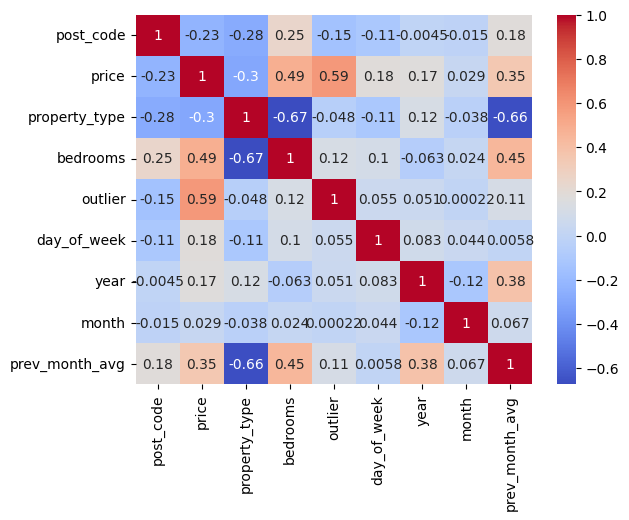

In [77]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")